In [57]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from datetime import datetime, timedelta
import cartopy.crs as ccrs
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
GeoAxes._pcolormesh_patched = Axes.pcolormesh
# fname = '/lus/dal/cccr_rnd/manmeet/iccp/data/INDIA.shp'
# adm1_shapes = list(shpreader.Reader(fname).geometries())
import xesmf as xe

data_dir_1 = '/home/cccr/msingh/dev_lab/ndvi3g_geo_v1_1981_0712.nc4'  # daily
ds_gimms = xr.open_dataset(data_dir_1)

data_dir_2 = '/home/cccr/msingh/dev_lab/precip.1981.nc'
ds_cpc = xr.open_dataset(data_dir_2)

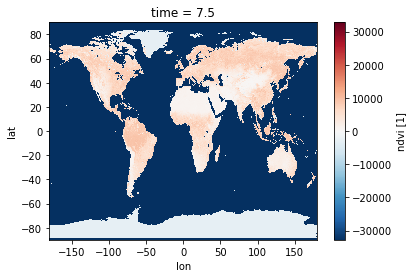

In [45]:
ds_gimms.ndvi.isel(time=1).plot()

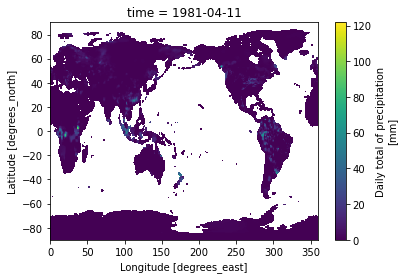

In [46]:
ds_cpc.precip.isel(time=100).plot()

In [47]:
# NDVI is a 15 day data and CPC is a monthly data
# Tasks to be performed: 
# 1. Regrid NDVI data to CPC
# 2. Negative to nan in NDVI, add time information in ndvi
# 3. CPC data to 15 day mean
# 4. Create event based time series in both the datasets
# 5. Use R code to do event coincidence analysis at 15 to 90 day coincidence period lag
# 6. Plot the Trigger coincidence rate and Precursor coincidence rate

In [48]:
ds_gimms.ndvi.time

<xarray.DataArray 'time' (time: 12)>
array([ 7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5])
Coordinates:
  * time     (time) float64 7.0 7.5 8.0 8.5 9.0 9.5 ... 10.5 11.0 11.5 12.0 12.5

In [49]:
ds_gimms.ndvi

<xarray.DataArray 'ndvi' (time: 12, lat: 2160, lon: 4320)>
[111974400 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * lat      (lat) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * time     (time) float64 7.0 7.5 8.0 8.5 9.0 9.5 ... 10.5 11.0 11.5 12.0 12.5
Attributes:
    units:        1
    scale:        x 10000
    valid_range:  [-0.3  1. ]

In [50]:
ndvi_ = ds_gimms.ndvi.values
ndvi_[ndvi_<0.0] = np.nan

In [51]:
ds_gimms['ndvi'] = (('time', 'lat', 'lon'),ndvi_)
#ds_gimms['ndvi']

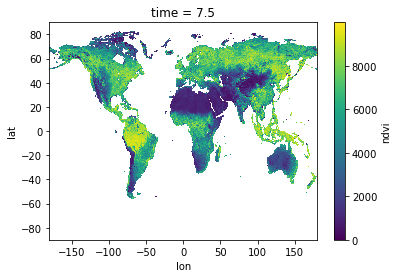

In [52]:
ds_gimms.ndvi.isel(time=1).plot()

In [38]:
ds_out = xr.Dataset({'lat': (['lat'], ds_cpc.precip.lat.values),
                     'lon': (['lon'], ds_cpc.precip.lon.values),
                    }
                   )

In [39]:
regridder = xe.Regridder(ds_gimms.ndvi, ds_out, 'bilinear')

Create weight file: bilinear_2160x4320_360x720.nc


In [40]:
regridder.clean_weight_file()

Remove file bilinear_2160x4320_360x720.nc


In [53]:
ds_ndvi_o = regridder(ds_gimms.ndvi)

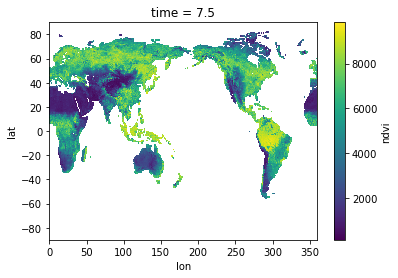

In [54]:
ds_ndvi_o.isel(time=1).plot()

In [55]:
ds_ndvi_o

<xarray.DataArray 'ndvi' (time: 12, lat: 360, lon: 720)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) float64 7.0 7.5 8.0 8.5 9.0 9.5 ... 10.5 11.0 11.5 12.0 12.5
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Attributes:
    regrid_method:  bilinear

In [83]:
year = int(data_dir_1[-13:-9])

In [78]:
data_dir_1[-9:-4]=='_0106'

True

In [70]:
data_dir_1 = '/home/cccr/msingh/dev_lab/ndvi3g_geo_v1_1982_0106.nc4'  # daily
ds_gimms = xr.open_dataset(data_dir_1)

In [86]:
ds_gimms

<xarray.Dataset>
Dimensions:     (lat: 2160, lon: 4320, time: 12)
Coordinates:
  * lon         (lon) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * lat         (lat) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * time        (time) float64 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 6.0 6.5
Data variables:
    satellites  (time) int16 ...
    ndvi        (time, lat, lon) float32 ...
    percentile  (time, lat, lon) int16 ...
Attributes:
    FileName:              ndvi3g_geo_v1_1982_0106.nc4
    Institution:           NASA/GSFC GIMMS
    Data:                  NDVI3g version 1
    Reference:             1. Pinzon, J.E.; Tucker, C.J.                     ...
    CommentsVersion1:      version1 includes two major fixes (a and b), and t...
    Temporalrange:         1981-07-01 -> 2015-12-31
    Year:                  1982.0
    RangeSemester:         Jan 01 - Jun 30 (1:0.5:6.5)
    SpatialResolution:     1/12 x 1/12 degrees
    TemporalResolution:    1/24 a year
    _fill_val:             -32768.0
    NorthernmostLatitude:  90
    SouthernmostLatitude:  -90
    WesternmostLongitude:  -180
    EasternmostLongitude:  180

In [73]:
# The page https://climatedataguide.ucar.edu/climate-data/ndvi-normalized-difference-vegetation-index-3rd-generation-nasagfsc-gimms
# says that the first data point is on July 1 1981 so we will make the data accordingly

In [91]:
import datetime
num=0
if data_dir_1[-9:-4]=='_0712':
    num=6
year = year+1
dt = [datetime.datetime(year, 1, 1, 0, 0), \
              datetime.datetime(year, 1+num, 15, 0, 0), \
              datetime.datetime(year, 2+num, 1, 0, 0), \
              datetime.datetime(year, 2+num, 15, 0, 0), \
              datetime.datetime(year, 3+num, 1, 0, 0), \
              datetime.datetime(year, 3+num, 15, 0, 0), \
              datetime.datetime(year, 4+num, 1, 0, 0), \
              datetime.datetime(year, 4+num, 15, 0, 0), \
              datetime.datetime(year, 5+num, 1, 0, 0), \
              datetime.datetime(year, 5+num, 15, 0, 0), \
              datetime.datetime(year, 6+num, 1, 0, 0), \
              datetime.datetime(year, 6+num, 15, 0, 0)]


In [92]:
dt

[datetime.datetime(1983, 1, 1, 0, 0),
 datetime.datetime(1983, 1, 15, 0, 0),
 datetime.datetime(1983, 2, 1, 0, 0),
 datetime.datetime(1983, 2, 15, 0, 0),
 datetime.datetime(1983, 3, 1, 0, 0),
 datetime.datetime(1983, 3, 15, 0, 0),
 datetime.datetime(1983, 4, 1, 0, 0),
 datetime.datetime(1983, 4, 15, 0, 0),
 datetime.datetime(1983, 5, 1, 0, 0),
 datetime.datetime(1983, 5, 15, 0, 0),
 datetime.datetime(1983, 6, 1, 0, 0),
 datetime.datetime(1983, 6, 15, 0, 0)]

In [93]:
ds_gimms['time'] = ('time', dt)

In [94]:
ds_gimms.to_netcdf("test.nc")

In [96]:
ds_cpc.time

<xarray.DataArray 'time' (time: 365)>
array(['1981-01-01T00:00:00.000000000', '1981-01-02T00:00:00.000000000',
       '1981-01-03T00:00:00.000000000', ..., '1981-12-29T00:00:00.000000000',
       '1981-12-30T00:00:00.000000000', '1981-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-01-02 ... 1981-12-31
Attributes:
    long_name:           Time
    axis:                T
    standard_name:       time
    coordinate_defines:  start
    actual_range:        [710040. 718776.]
    delta_t:             0000-00-01 00:00:00
    avg_period:          0000-00-01 00:00:00

In [97]:
# day 1 to 7 
# day 8 to 23
# divide the number of days(num) in a month by 2, then from the mid of the month +- num/2
# are the two markings, use them to find out 15 day rainfall

In [99]:
for i in range(24):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [112]:
dates = ds_cpc.time.values[0]
print(pd.to_datetime(dates).year)
year_ = pd.to_datetime(dates).year

1981


In [117]:
from calendar import monthrange
mon_days = []
for mm in range(1,13):
    mon_days.append(monthrange(year_, mm)[1])

In [120]:
mon_days

[31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

In [121]:
len(mon_days)

12

In [124]:
for i in range(len(mon_days)):
    print(np.floor(mon_days[i]/4))

7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0
7.0


In [125]:
print(15-7,15+7)

8 22


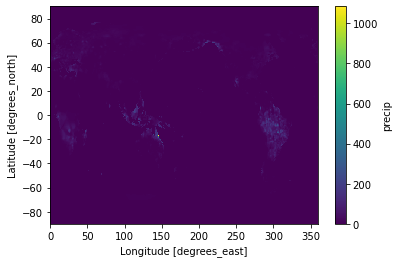

In [128]:
ds_cpc.precip.sel(time=slice('1981-01-01','1981-01-08')).sum(dim='time').plot()

In [129]:
ds_cpc.precip.values.shape

(365, 360, 720)

In [130]:
pr = np.zeros((24,ds_cpc.precip.values.shape[1], ds_cpc.precip.values.shape[2]))

In [131]:
data_dir_2 = '/home/cccr/msingh/dev_lab/precip.1981_2020_cpc_mon.nc'
ds_cpc = xr.open_dataset(data_dir_2)

In [134]:
data_dir_2 = '/home/cccr/msingh/dev_lab/precip.1981_2020_cpc.nc'
ds_cpc = xr.open_dataset(data_dir_2)

In [135]:
pr = ds_cpc.precip.values

In [143]:
print(np.nanpercentile(pr,90)) # Light

3.5912978649139404


In [141]:
print(np.nanpercentile(pr,99)) #Moderate

25.452680587768555


In [138]:
print(np.nanpercentile(pr,99.9))# Heavy

65.18095639038802


In [140]:
print(np.nanpercentile(pr,99.95)) #Very Heavy

83.06095886230469


In [139]:
print(np.nanpercentile(pr,99.99)) # Extreme

154.58268083340226


In [144]:
# So, the strategy to classify rainfall in categories using any scale such as 
# mm/hr or mm/month should be based upon the above percentile values